In [5]:
# NON-LINEAR REGRESSION WITH DEEP LEARNING
# https://medium.com/analytics-vidhya/non-linear-regression-with-deep-learning-221584ccc8c2
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy
from keras.optimizers import Adam
import keras
from matplotlib import pyplot
from keras.callbacks import EarlyStopping
import pandas as pd 
from sklearn.preprocessing import LabelEncoder

In [6]:
# Read data from csv file for training and validation data
TrainingSet = numpy.genfromtxt("./training.csv", delimiter=",", skip_header=True)
ValidationSet = numpy.genfromtxt("./validation.csv", delimiter=",", skip_header=True)

# Split into input (X) and output (Y) variables
X1 = TrainingSet[:,0:6]
Y1 = TrainingSet[:,6]

X2 = ValidationSet[:,0:6]
Y2 = ValidationSet[:,6]

In [8]:
# Create model
model = Sequential()
model.add(Dense(128, activation="relu", input_dim=6))
model.add(Dense(32, activation="relu"))
model.add(Dense(8, activation="relu"))
# Since the regression is performed, a Dense layer containing a single neuron with a linear activation function.
# Typically ReLu-based activation are used but since it is performed regression, it is needed a linear activation.
model.add(Dense(1, activation="linear"))

# Compile model: The model is initialized with the Adam optimizer and then it is compiled.
model.compile(loss='mean_squared_error', optimizer=Adam(lr=1e-3, decay=1e-3 / 200))

# Patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)

# Fit the model
history = model.fit(X1, Y1, validation_data=(X2, Y2), epochs=10000000, batch_size=100, verbose=2, callbacks=[es])

Epoch 1/10000000
3/3 - 0s - loss: 356.1082 - val_loss: 279.7620
Epoch 2/10000000
3/3 - 0s - loss: 343.8714 - val_loss: 269.1766
Epoch 3/10000000
3/3 - 0s - loss: 331.7685 - val_loss: 258.6883
Epoch 4/10000000
3/3 - 0s - loss: 319.8349 - val_loss: 248.4594
Epoch 5/10000000
3/3 - 0s - loss: 307.6760 - val_loss: 239.5252
Epoch 6/10000000
3/3 - 0s - loss: 297.4308 - val_loss: 231.3611
Epoch 7/10000000
3/3 - 0s - loss: 287.7090 - val_loss: 223.7503
Epoch 8/10000000
3/3 - 0s - loss: 278.2418 - val_loss: 216.5136
Epoch 9/10000000
3/3 - 0s - loss: 269.5286 - val_loss: 210.3322
Epoch 10/10000000
3/3 - 0s - loss: 261.5402 - val_loss: 205.4074
Epoch 11/10000000
3/3 - 0s - loss: 254.1777 - val_loss: 201.6724
Epoch 12/10000000
3/3 - 0s - loss: 248.5169 - val_loss: 199.3473
Epoch 13/10000000
3/3 - 0s - loss: 244.1609 - val_loss: 198.5330
Epoch 14/10000000
3/3 - 0s - loss: 241.5346 - val_loss: 199.0024
Epoch 15/10000000
3/3 - 0s - loss: 239.7903 - val_loss: 200.3652
Epoch 16/10000000
3/3 - 0s - loss:

In [9]:
# Calculate predictions
PredTestSet = model.predict(X1)
PredValSet = model.predict(X2)

# Save predictions
numpy.savetxt("trainresults.csv", PredTestSet, delimiter=",")
numpy.savetxt("valresults.csv", PredValSet, delimiter=",")

Text(0, 0.5, 'Predicted')

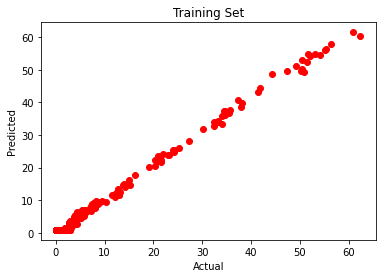

In [10]:
# Plot actual vs prediction for training set
TestResults = numpy.genfromtxt("trainresults.csv", delimiter=",")
plt.plot(Y1,TestResults,'ro')
plt.title('Training Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')

Training Set R-Square= 0.9951244415154008


Text(0, 0.5, 'Predicted')

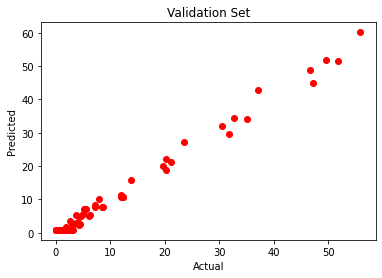

In [11]:
# Compute R-Square value for training set
TestR2Value = r2_score(Y1,TestResults)
print("Training Set R-Square=", TestR2Value)

# Plot actual vs prediction for validation set
ValResults = numpy.genfromtxt("valresults.csv", delimiter=",")
plt.plot(Y2, ValResults,'ro')
plt.title('Validation Set')
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [12]:
# Compute R-Square value for validation set
ValR2Value = r2_score(Y2,ValResults)
print("Validation Set R-Square=",ValR2Value)

Validation Set R-Square= 0.9893432723778979
